In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helper import get_data_markets

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
TICKER_NAME = 'DJIA'
interval = '1d'

start_date = '2021-10-18'
end_date = '2023-10-18'

In [3]:
df = get_data_markets(ticker=TICKER_NAME, interval=interval, start_date=start_date, end_date=end_date, source='yahoo')
df.shape

(414, 9)

In [4]:
df.head()

Date       Open       High        Low      Close  \
0 2022-02-24 00:00:00-05:00  20.500953  20.865623  20.388878  20.865623   
1 2022-02-25 00:00:00-05:00  21.044078  21.191498  20.854414  21.191498   
2 2022-02-28 00:00:00-05:00  21.268228  21.268228  21.069943  21.206156   
3 2022-03-01 00:00:00-05:00  21.363060  21.363060  20.880278  20.925108   
4 2022-03-02 00:00:00-05:00  21.250984  21.302710  21.052699  21.259605   

   Volume  Dividends  Stock Splits  Capital Gains  
0   22700        0.0           0.0            0.0  
1   26800        0.0           0.0            0.0  
2    4100        0.0           0.0            0.0  
3    8300        0.0           0.0            0.0  
4   14300        0.0           0.0            0.0

In [5]:
df = df[df.columns[1:5]]
df

Open       High        Low      Close
0    20.500953  20.865623  20.388878  20.865623
1    21.044078  21.191498  20.854414  21.191498
2    21.268228  21.268228  21.069943  21.206156
3    21.363060  21.363060  20.880278  20.925108
4    21.250984  21.302710  21.052699  21.259605
..         ...        ...        ...        ...
409  21.484502  21.484502  21.275915  21.355377
410  21.395109  21.439804  21.166654  21.385176
411  21.315644  21.484500  21.265981  21.325577
412  21.395107  21.643426  21.395107  21.544098
413  21.484500  21.653357  21.424904  21.544098

[414 rows x 4 columns]

In [6]:
dataset = df.to_numpy()
dataset.shape

(414, 4)

In [7]:
close_prices = df['Close'].values
samples, gts = [], []
for i in range(250, len(close_prices)-1):
    samples.append(close_prices[i-250: i])
    gts.append(close_prices[i+1])

train_x, train_y = samples[:-160], gts[:-160]
val_x, val_y = samples[-160:], gts[-160:]

In [10]:
lin_reg = LinearRegression().fit(train_x, train_y)
prediction = lin_reg.predict(val_x)

In [11]:
coef = lin_reg.coef_
bias = lin_reg.intercept_
coef.shape, bias

((250,), 20.074275946062485)

[array([20.86714907]), array([20.87563886])]


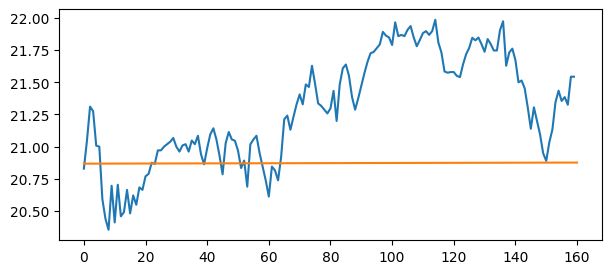

In [12]:
plt.figure(figsize=(7,3))
regression = []

plt.plot(val_y)
print([lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]])])
plt.plot([0, len(val_y)], [lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]])])

# plt.plot(regression, color='red')
plt.show()

In [13]:
start, end = (lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]]))

In [14]:
tan = (end - start) / (val_x[-1][0] - val_x[0][0])
tan

array([-0.00561511])

In [15]:
b = end - tan * val_x[0][0]
b

array([20.9931357])

In [16]:
ups, downs = np.zeros(len(val_x[-1])), np.zeros(len(val_x[-1]))
treshold = 1e-2

for idx, x in enumerate(val_x[-1]):
    _x = x * tan + b
    if x - _x > treshold:
        ups[idx] += 1
    elif x - _x <= -treshold:
        downs[idx] += 1

In [17]:
print(ups.sum(), downs.sum())

152.0 96.0


In [18]:
print(f'fitted ratio = {(len(val_x[-1]) - ups.sum() - downs.sum()) / len(val_x[-1])}' +\
      f'\toutfitted ratio = {(ups.sum() + downs.sum()) / len(val_x[-1])}')


fitted ratio = 0.008	outfitted ratio = 0.992


In [19]:
df_to_predict = get_data_markets(ticker=TICKER_NAME, interval=interval, start_date='2022-10-18', end_date=end_date, source='yahoo')
close_prices = df_to_predict['Close'].values

fitted = close_prices * tan + b
residuals = close_prices - fitted
# TODO make points and sen calculate residuals

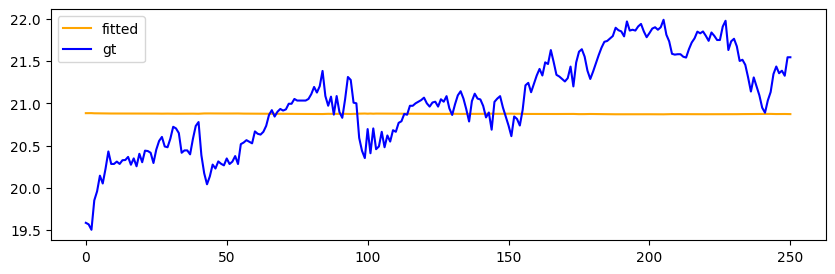

In [20]:
plt.figure(figsize=(10, 3))
plt.plot(fitted, label='fitted', color='orange')
plt.plot(close_prices, label='gt', color='blue')
plt.legend()
plt.show()

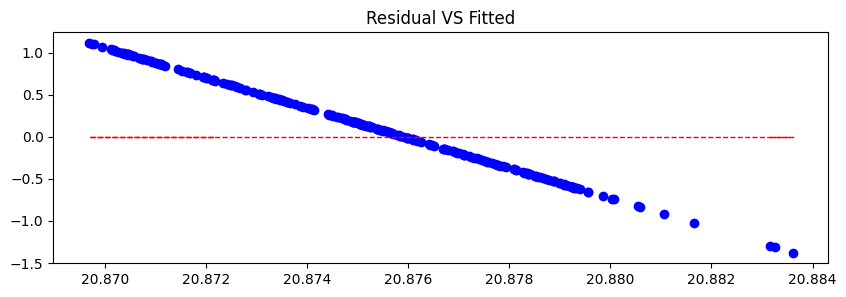

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(fitted, residuals, 'bo')
plt.plot(fitted, np.zeros(len(residuals)), 'r--', linewidth=1)
plt.title('Residual VS Fitted')
plt.show()

<class 'numpy.ndarray'>


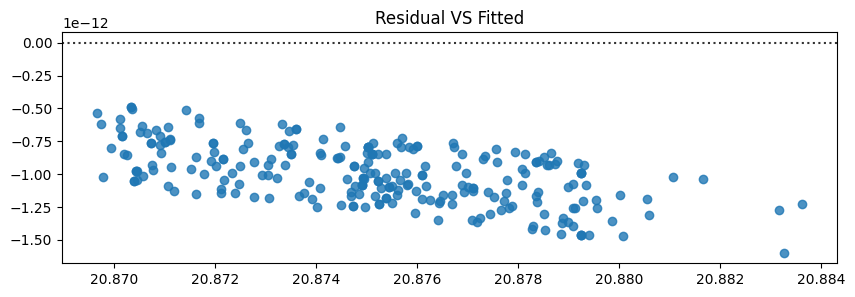

In [25]:
import seaborn as sns

data = {'fitted': fitted, 'gt': close_prices }
print(type(fitted))

plt.figure(figsize=(10,3))
fig = sns.residplot(x='fitted', y='gt', data=data) 
plt.title('Residual VS Fitted')
plt.show()


"""
видим, что очень сильно коррелированы
"""

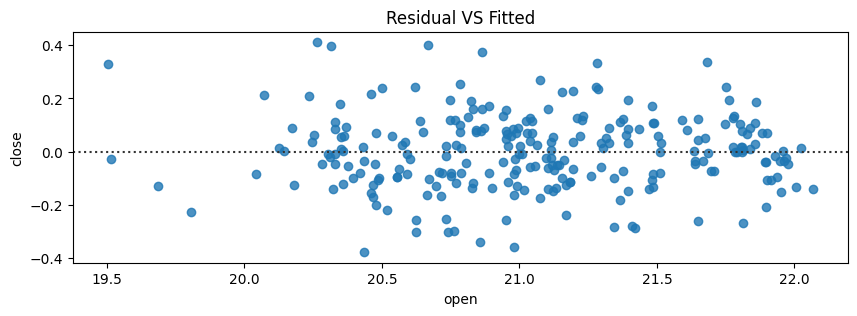

In [33]:
data = {'open': df_to_predict['Open'].values, 'gt': close_prices }

plt.figure(figsize=(10,3))
fig = sns.residplot(x='open', y='gt', data=data) 
plt.title('Residual VS Fitted')
plt.xlabel('open')
plt.ylabel('close')
plt.show()

In [23]:
import statsmodels.api as sm

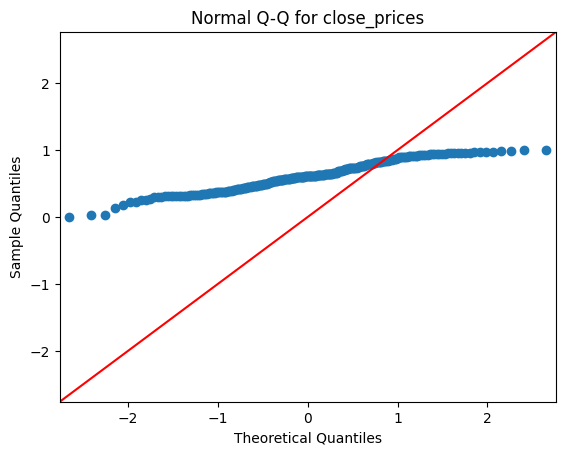

In [26]:
# немного нормализовал, чтообы помещался
fig = sm.qqplot((close_prices - np.min(close_prices)) / (np.max(close_prices) - np.min(close_prices)), line='45')
plt.title('Normal Q-Q for close_prices')
plt.show()

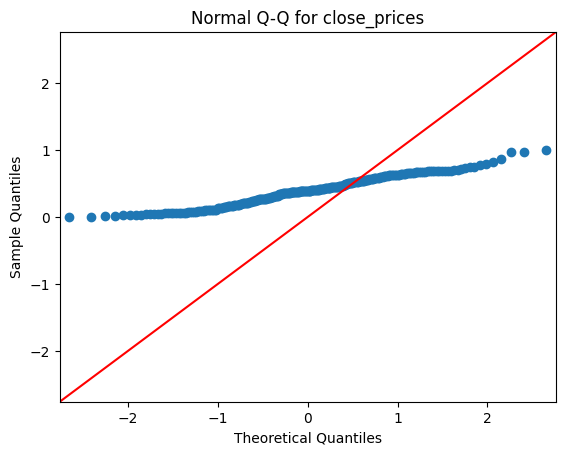

In [28]:
fig = sm.qqplot((fitted - np.min(fitted)) / (np.max(fitted) - np.min(fitted)), line='45')
plt.title('Normal Q-Q for close_prices')
plt.show()